<a href="https://colab.research.google.com/github/SamaSamrin/Computer-Vision-Assignments/blob/main/1%20Unit%20Impulse%20and%20Hybrid%20Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Run the code on Google colab.**

This file's Colab link: https://colab.research.google.com/drive/16qw2dfv0GVr5B5O3KIXNiTZ4Z21TzdIm?usp=sharing

The full Assignment 1 submission folder (includes the images): https://drive.google.com/drive/folders/1jh5fPC5csv9ieZ2jDGqEWT8vFI9E4AUg?usp=sharing

# Assignment Instructions

Q1. Create an image of size 32×32 pixels that consists of a unit impulse at location (16,16) and zeros elsewhere. Use this image and a kernel of your choice to confirm that your function is indeed performing convolution. Display your results and explain what you did and why. [5 points]

Q2. Create a reconstruction of an input image (of your choice) from its Fourier transform - first by using only the magnitude response, second by using only the phase response, and lastly by using both magnitude and phase responses. These methods are described in the 1983 research paper [Oppenheim, A. V., Lim, J. S., & Curtis, S. R. (1983). Signal synthesis and reconstruction from partial Fourier-domain information. JOSA, 73(11), 1413-1420]. [5 points]

OR

Q2. Create a grayscale hybrid image (of your choice) using the technique described in this 2006 paper by Oliva, Torralba, and Schyns [Hybrid images. ACM Transactions on Graphics (TOG), 25(3), 527-532]. Use trial and error to determine good values of σ for the high-pass and low-pass filters (it can vary from image to image). Can you use color images as input and produce the hybrid image? Try applying the filters on each of the three channels separately. [5 points]

Your submission should include the following:

 - A well-commented Python code (Share a link to Google colab).

 - Input images used in the program.

 - Brief analysis and explain the differences in your results.

 - Appropriate instructions on how to run your code (a readme file if applicable).

1. It is important to show HOW you arrive at your answers.
2. You must CITE all the resources that helped you shape your answer.
3. DO NOT indulge in direct copy and paste from any resource. Paraphrase and use quotations as appropriate.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Question 1
Create an image of size 32×32 pixels that consists of a unit impulse at location (16,16) and zeros elsewhere. Use this image and a kernel of your choice to confirm that your function is indeed performing convolution. Display your results and explain what you did and why. [5 points]

In [ ]:
import scipy

#understanding the unit umpulse function
scipy.signal.unit_impulse(8)

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
scipy.signal.unit_impulse((3, 3), 'mid')

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [ ]:
#creating a 32x32 array for creating the 32x32 pixels image
a = scipy.signal.unit_impulse((32, 32), 16)

In [ ]:
#to show all rows and columns of the matrix or numpy array
np.set_printoptions(threshold=np.inf)

In [ ]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
#confirming the value 1 is set at the desired position : (16,16)
a[16,16]

1.0

In [ ]:
a[16]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#displaying the matrix as an image
from google.colab.patches import cv2_imshow

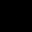

In [ ]:
cv2_imshow(a)

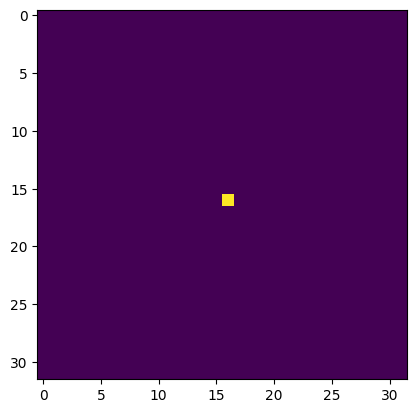

In [ ]:
#using Matplotlib to clearly see the difference between the 0-valued pixels and the 1-valued pixel
plt.imshow(a)
plt.show()

In [ ]:
# Displaying the height and width of the image to confirm its dimensions
height, width = a.shape[:2]
print("Height = {},  Width = {}".format(height, width))

Height = 32,  Width = 32


In [ ]:
#creating the kernel
sharpen_kernel = np.array([[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]])

In [ ]:
#convolving the original image with the kernel
convolution_output = scipy.ndimage.convolve(a, sharpen_kernel)

In [ ]:
print(convolution_output)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [ ]:
#displaying rows with changed values: 0 to -1, and 1 to -5
convolution_output[15:18]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  5., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]])

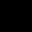

In [ ]:
cv2_imshow(convolution_output)

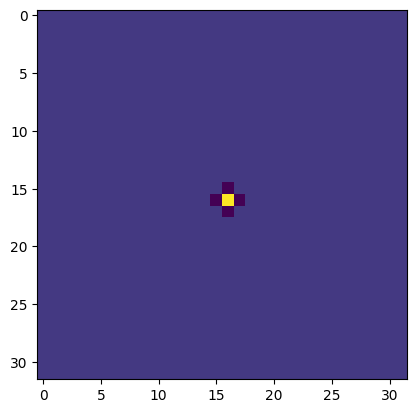

In [ ]:
plt.imshow(convolution_output)
plt.show()

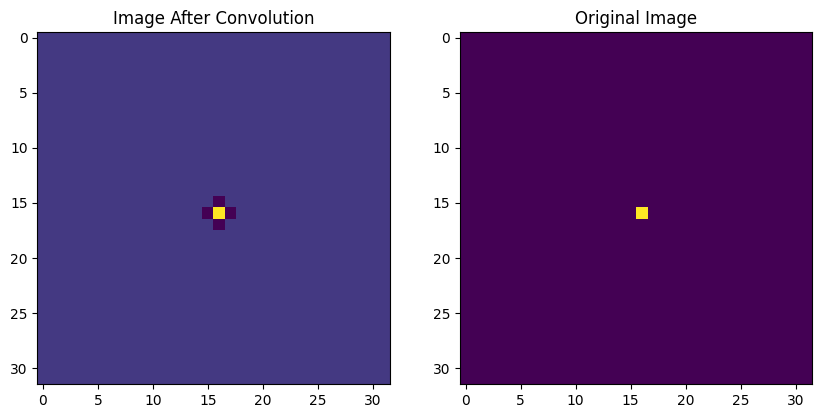

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(convolution_output)
ax2.imshow(a)
ax1.title.set_text("Image After Convolution")
ax2.title.set_text("Original Image")

As we can see from the convolved image and the original image being displayed side by side above,
* the final image shows the change at the upper-lower neighbors of its central pixel, which is in line with the kind of kernel we used
* the entire image also has gotten lighter in color

So the convolution with the sharpening kernel was successful for the 32x32 image we created, which had just one non-zero value at its central position.

Resources used for this answer:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.unit_impulse.html (scipy code instructions to use unit impulse function)
* https://stackoverflow.com/questions/1987694/how-do-i-print-the-full-numpy-array-without-truncation (printing all rows of a numpy array)
* https://en.wikipedia.org/wiki/Kernel_(image_processing) (for types of kernels)
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve (for convolve function of scipy)

# Question 2

Create a grayscale hybrid image (of your choice) using the technique described in this 2006 paper by Oliva, Torralba, and Schyns [Hybrid images. ACM Transactions on Graphics (TOG), 25(3), 527-532]. Use trial and error to determine good values of σ for the high-pass and low-pass filters (it can vary from image to image). Can you use color images as input and produce the hybrid image? Try applying the filters on each of the three channels separately. [5 points]

"Hybrid images are generated by superimposing two images at two
different spatial scales: the low-spatial scale is obtained by filtering
one image with a low-pass filter; the high spatial scale is obtained
by filtering a second image with a high-pass filter. The final image is composed by adding these two filtered images."

## Converting two selected images to grayscale

In [ ]:
image_1 = cv2.imread('003_1.png')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_1_grayscale = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

height, width = image_1.shape[:2]
#print("Height = {},  Width = {}".format(height, width))

image_1_grayscale = cv2.resize(image_1_grayscale, (int(width), int(height)))
#cv2_imshow(image_1_grayscale)

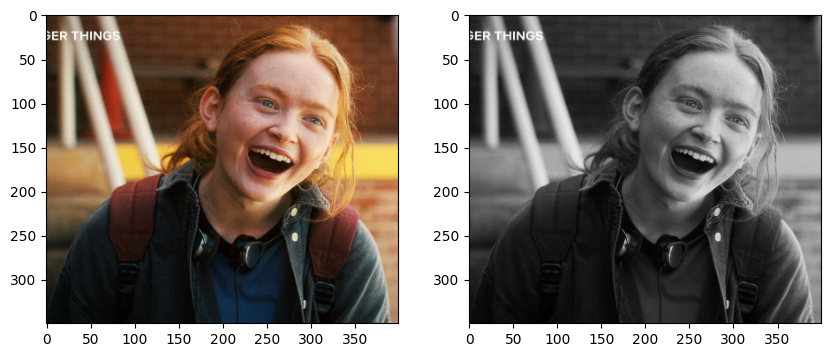

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(image_1)
ax2.imshow(image_1_grayscale, cmap='gray')

In [ ]:
image_2 = cv2.imread('004.png')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
image_2_grayscale = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

height, width = image_2.shape[:2]
#print("Height = {},  Width = {}".format(height, width))

image_2_grayscale = cv2.resize(image_2_grayscale, (int(width), int(height)))
#cv2_imshow(image_2_grayscale)

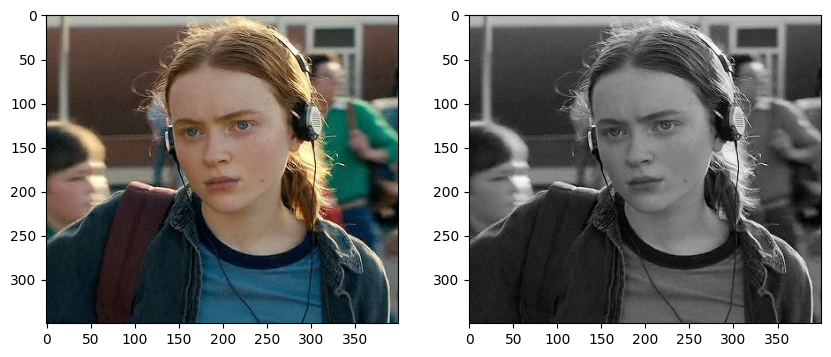

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(image_2, cmap='Wistia')
ax2.imshow(image_2_grayscale, cmap='gray')

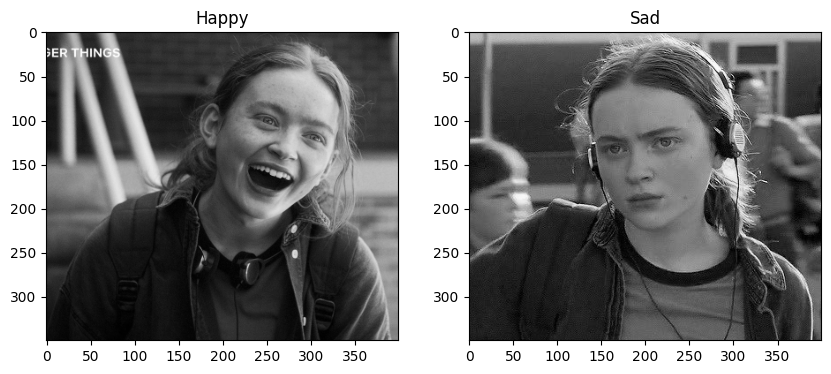

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(image_1_grayscale, cmap='gray')
ax2.imshow(image_2_grayscale, cmap='gray')
ax1.title.set_text("Happy")
ax2.title.set_text("Sad")

In [ ]:
height, width = image_1_grayscale.shape[:2]
print("Image 1, Height = {},  Width = {}".format(height, width))

height, width = image_2_grayscale.shape[:2]
print("Image 2, Height = {},  Width = {}".format(height, width))

#image_1_grayscale = cv2.resize(image_1_grayscale, (int(width/2), int(height/2)))

Image 1, Height = 350,  Width = 400
Image 2, Height = 350,  Width = 400


In [ ]:
dimensions_image_1 = image_1_grayscale.shape
print(dimensions_image_1)

dimensions_image_2 = image_2_grayscale.shape
print(dimensions_image_2)

(350, 400)
(350, 400)


* Image 1 is high resolution (that's to be seen up close)
* Image 2 is low resolution (that's to be seen at a far distance)

## Creating the hybrid image

A so-called **cutoff frequency value** controls the **crossover point** at which the two images are joined. A lower value preserves more high frequencies of the image and only uses the very highest frequencies of the second image.

The low frequency image is simply a convolution of the original image with a 2D Gaussian filter. The high frequency image is obtained by subtracting the low frequency convolution from the original image.

[https://www.cc.gatech.edu/classes/AY2016/cs4476_fall/results/proj1/html/cpolack6/index.html]

* Gaussian blur is a low-pass filter, attenuating high frequency signals.
* Frequency in images is the rate of change of intensity values. Thus, a high-frequency image is the one where the intensity values change quickly from one pixel to the next. On the other hand, a low-frequency image may be one that is relatively uniform in brightness or where intensity changes very slowly.

Far away, the low frequency values dominate, BLURRED

close up, the high frequency values are prominent, specific contrasts and color gradient changes

### filtering one image with a low-pass filter (blurry, for far away image)

printing blurred image with sigma =  1


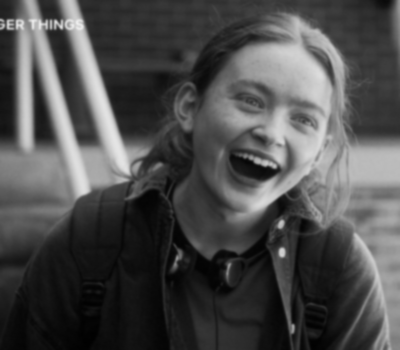

printing blurred image with sigma =  2


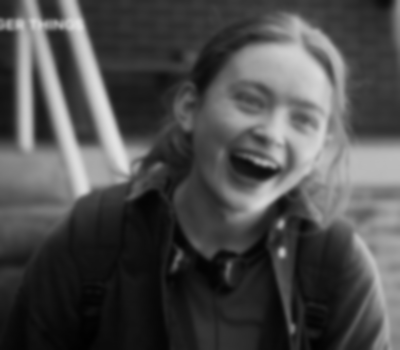

printing blurred image with sigma =  3


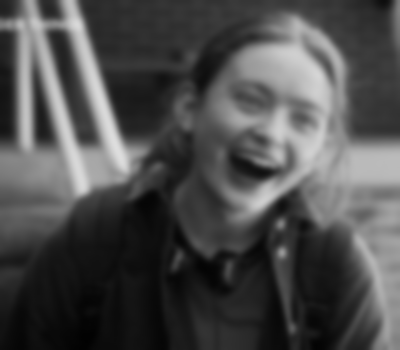

printing blurred image with sigma =  4


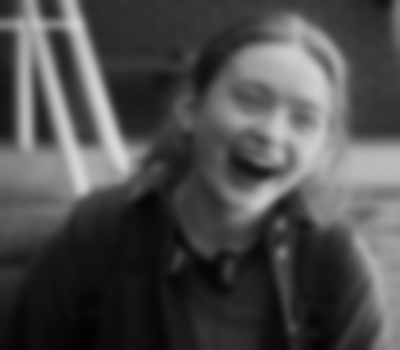

printing blurred image with sigma =  5


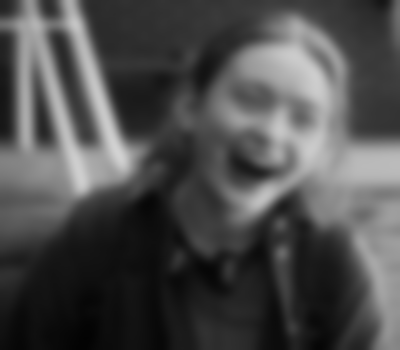

In [ ]:
#Looking for the best value of sigma

blurry_images_with_differet_sigmas = []

for i in range(1,6):
  low_pass_image = scipy.ndimage.gaussian_filter(image_1_grayscale, sigma=i)
  blurry_images_with_differet_sigmas.append(low_pass_image)
  print("printing blurred image with sigma = ", i)
  cv2_imshow(low_pass_image)
  i+=1

We are choosing sigma = 4

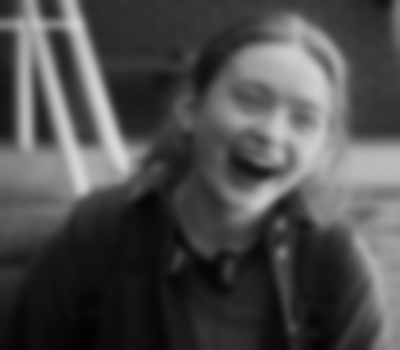

In [ ]:
low_pass_image = scipy.ndimage.gaussian_filter(image_1_grayscale, sigma=4)
cv2_imshow(low_pass_image)

### filtering a second image with a high-pass filter (sharper)

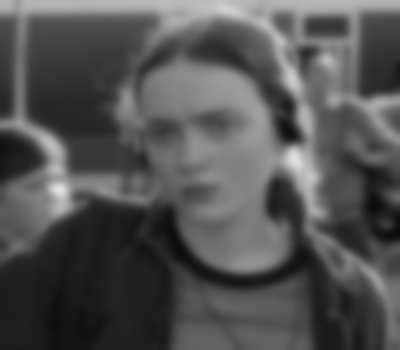

In [ ]:
#Blurring the image first with Gaussian filter

blurred_image_2 = scipy.ndimage.gaussian_filter(image_2_grayscale, sigma=4)
cv2_imshow(blurred_image_2)

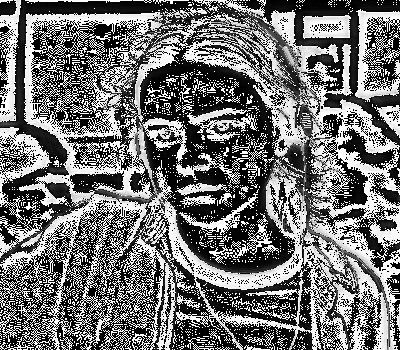

In [ ]:
high_pass_image = image_2_grayscale - blurred_image_2

cv2_imshow(high_pass_image)

### final image is composed by adding these two filtered images

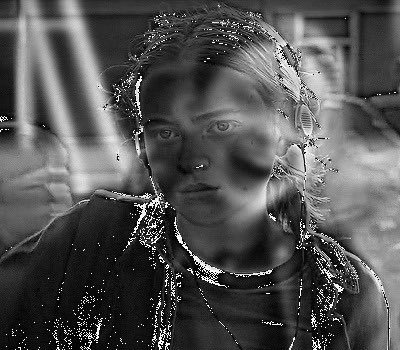

In [ ]:

final_hybrid_image = low_pass_image + high_pass_image

cv2_imshow(final_hybrid_image)

## Trying with the colored versions

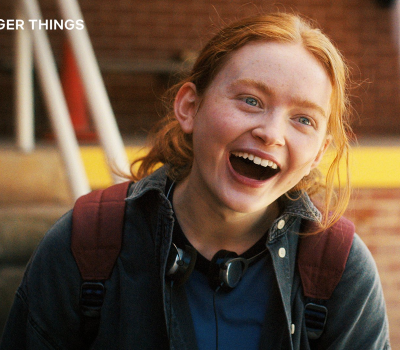

In [ ]:
image_3 = cv2.imread('003_1.png')
#image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

cv2_imshow(image_3)

### **The colored image is turning grayer as the sigma value is increasing, after applying Gaussian filter.**

printing blurred image with sigma =  0.25


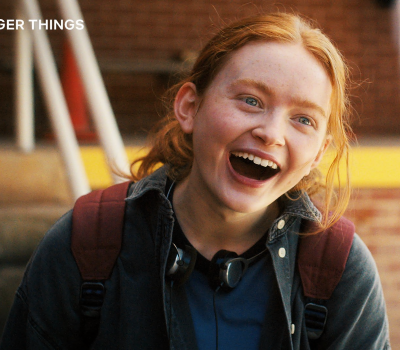

printing blurred image with sigma =  0.75


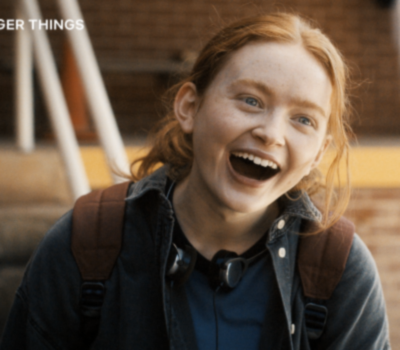

printing blurred image with sigma =  1.25


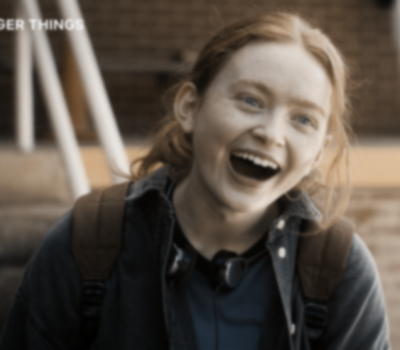

printing blurred image with sigma =  1.75


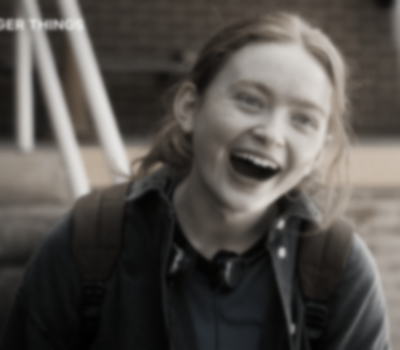

printing blurred image with sigma =  2.25


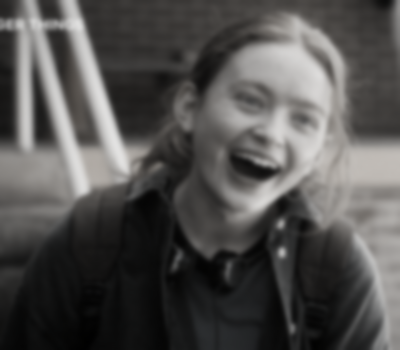

printing blurred image with sigma =  2.75


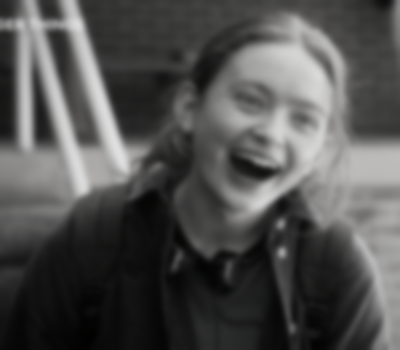

In [ ]:
#Looking for the best value of sigma

blurry_images_with_differet_sigmas = []

i=0.25
while i<3:
  low_pass_image = scipy.ndimage.gaussian_filter(image_3, sigma=i)
  blurry_images_with_differet_sigmas.append(low_pass_image)
  print("printing blurred image with sigma = ", i)
  cv2_imshow(low_pass_image)
  i+=0.5

### Choosing a sigma value and making the low pass filter for color image

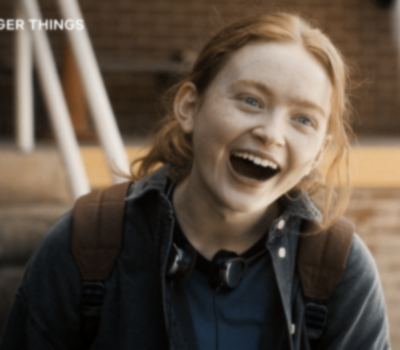

In [ ]:
#low pass filter image

low_pass_color_image = scipy.ndimage.gaussian_filter(image_3, sigma=1)
cv2_imshow(low_pass_color_image)

### Choosing a sigma value and making the high pass filter for color image

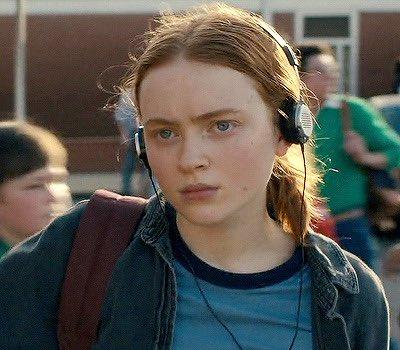

In [ ]:
image_4 = cv2.imread('004.png')
#image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

cv2_imshow(image_4)

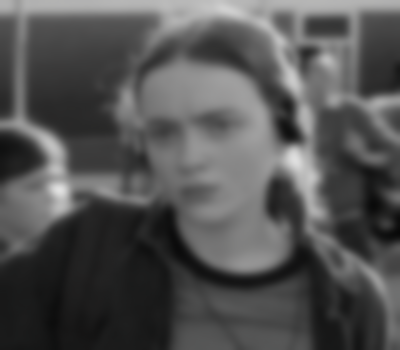

In [ ]:
#Blurring the image first with Gaussian filter

blurred_image_2_color = scipy.ndimage.gaussian_filter(image_4, sigma=4)
cv2_imshow(blurred_image_2_color)

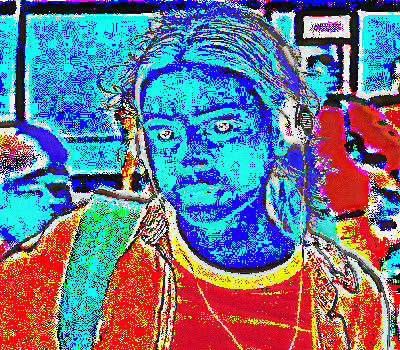

In [ ]:
high_pass_image_color = image_4 - blurred_image_2_color

cv2_imshow(high_pass_image_color)

### Final hybrid image for the colored versions

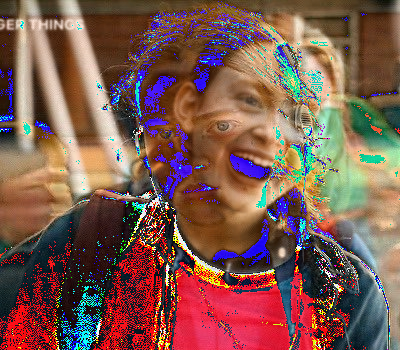

In [ ]:
final_hybrid_image_color = low_pass_color_image + high_pass_image_color

cv2_imshow(final_hybrid_image_color)

The final result looks very odd, and doesn't seem to work for near or far visions.

References:

*   https://dl.acm.org/doi/pdf/10.1145/1141911.1141919 (the 2006 paper)
*   https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading (OpenCV changes original image into BGR, changing it back to RGB)
*  https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html#scipy.ndimage.gaussian_filter

